<a href="https://colab.research.google.com/github/20hnu/ml_projects/blob/main/Credit_Card_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import warnings
import os

In [138]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
a1 = pd.read_excel("/content/drive/MyDrive/credit risk/case_study1.xlsx")
a2 = pd.read_excel("/content/drive/MyDrive/credit risk/case_study2.xlsx")


In [140]:
df1 = a1.copy()
df2 = a2.copy()

In [141]:
df1.shape

(51336, 26)

In [142]:
df2.shape

(51336, 62)

In [143]:
df1.head(5)

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32


In [144]:
df2.head(5)

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


In [145]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [146]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

In [147]:
#Remove nulls
df1 = df1.loc[df1["Age_Oldest_TL"] != -99999]

columns_to_be_removed =[]

for i in df2.columns:
  if df2.loc[df2[i] == -99999].shape[0] > 10000:
    columns_to_be_removed.append(i)

In [148]:
df2 = df2.drop(columns_to_be_removed, axis=1)

In [149]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51296 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51296 non-null  int64  
 1   Total_TL              51296 non-null  int64  
 2   Tot_Closed_TL         51296 non-null  int64  
 3   Tot_Active_TL         51296 non-null  int64  
 4   Total_TL_opened_L6M   51296 non-null  int64  
 5   Tot_TL_closed_L6M     51296 non-null  int64  
 6   pct_tl_open_L6M       51296 non-null  float64
 7   pct_tl_closed_L6M     51296 non-null  float64
 8   pct_active_tl         51296 non-null  float64
 9   pct_closed_tl         51296 non-null  float64
 10  Total_TL_opened_L12M  51296 non-null  int64  
 11  Tot_TL_closed_L12M    51296 non-null  int64  
 12  pct_tl_open_L12M      51296 non-null  float64
 13  pct_tl_closed_L12M    51296 non-null  float64
 14  Tot_Missed_Pmnt       51296 non-null  int64  
 15  Auto_TL               51

In [150]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROSPECTID                  51336 non-null  int64  
 1   time_since_recent_payment   51336 non-null  int64  
 2   num_times_delinquent        51336 non-null  int64  
 3   max_recent_level_of_deliq   51336 non-null  int64  
 4   num_deliq_6mts              51336 non-null  int64  
 5   num_deliq_12mts             51336 non-null  int64  
 6   num_deliq_6_12mts           51336 non-null  int64  
 7   num_times_30p_dpd           51336 non-null  int64  
 8   num_times_60p_dpd           51336 non-null  int64  
 9   num_std                     51336 non-null  int64  
 10  num_std_6mts                51336 non-null  int64  
 11  num_std_12mts               51336 non-null  int64  
 12  num_sub                     51336 non-null  int64  
 13  num_sub_6mts                513

In [151]:
df2.loc[df2[i] == -99999].shape[1]

54

In [152]:
for i in df2.columns:
  df2 = df2.loc[df2[i] != -99999]

In [153]:
print(df1.shape)
print(df2.shape)

(51296, 26)
(42066, 54)


In [154]:
df2.isna().sum()

PROSPECTID                    0
time_since_recent_payment     0
num_times_delinquent          0
max_recent_level_of_deliq     0
num_deliq_6mts                0
num_deliq_12mts               0
num_deliq_6_12mts             0
num_times_30p_dpd             0
num_times_60p_dpd             0
num_std                       0
num_std_6mts                  0
num_std_12mts                 0
num_sub                       0
num_sub_6mts                  0
num_sub_12mts                 0
num_dbt                       0
num_dbt_6mts                  0
num_dbt_12mts                 0
num_lss                       0
num_lss_6mts                  0
num_lss_12mts                 0
recent_level_of_deliq         0
tot_enq                       0
CC_enq                        0
CC_enq_L6m                    0
CC_enq_L12m                   0
PL_enq                        0
PL_enq_L6m                    0
PL_enq_L12m                   0
time_since_recent_enq         0
enq_L12m                      0
enq_L6m 

In [155]:
df1.isna().sum()

PROSPECTID              0
Total_TL                0
Tot_Closed_TL           0
Tot_Active_TL           0
Total_TL_opened_L6M     0
Tot_TL_closed_L6M       0
pct_tl_open_L6M         0
pct_tl_closed_L6M       0
pct_active_tl           0
pct_closed_tl           0
Total_TL_opened_L12M    0
Tot_TL_closed_L12M      0
pct_tl_open_L12M        0
pct_tl_closed_L12M      0
Tot_Missed_Pmnt         0
Auto_TL                 0
CC_TL                   0
Consumer_TL             0
Gold_TL                 0
Home_TL                 0
PL_TL                   0
Secured_TL              0
Unsecured_TL            0
Other_TL                0
Age_Oldest_TL           0
Age_Newest_TL           0
dtype: int64

In [156]:
#checking common column names
for i in list(df1.columns):
  if i in list(df2.columns):
      print(i)

PROSPECTID


In [157]:
#dataset is merged as inner join
df = pd.merge(df1,df2,how="inner", left_on =["PROSPECTID"], right_on=["PROSPECTID"])

In [158]:
df.shape

(42064, 79)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROSPECTID                  42064 non-null  int64  
 1   Total_TL                    42064 non-null  int64  
 2   Tot_Closed_TL               42064 non-null  int64  
 3   Tot_Active_TL               42064 non-null  int64  
 4   Total_TL_opened_L6M         42064 non-null  int64  
 5   Tot_TL_closed_L6M           42064 non-null  int64  
 6   pct_tl_open_L6M             42064 non-null  float64
 7   pct_tl_closed_L6M           42064 non-null  float64
 8   pct_active_tl               42064 non-null  float64
 9   pct_closed_tl               42064 non-null  float64
 10  Total_TL_opened_L12M        42064 non-null  int64  
 11  Tot_TL_closed_L12M          42064 non-null  int64  
 12  pct_tl_open_L12M            42064 non-null  float64
 13  pct_tl_closed_L12M          420

In [160]:
df.head(5)

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0.0,0.0,0.000,0.0,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0.0,0.0,0.000,0.0,1,0,ConsumerLoan,others,693,P2
3,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0.0,0.0,0.000,0.0,0,0,AL,AL,753,P1
4,6,6,5,1,0,0,0.000,0.0,0.167,0.833,...,1.0,0.0,0.429,0.0,1,0,ConsumerLoan,PL,668,P3


In [161]:
#check how many are categorical
for i in list(df.columns):
  if df[i].dtypes == "object":
    print(i)

MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2
Approved_Flag


In [162]:
#chi-square test
for i in ["MARITALSTATUS","EDUCATION","GENDER","last_prod_enq2","first_prod_enq2"]:
  chi2, pval, _,_ = chi2_contingency(pd.crosstab(df[i],df["Approved_Flag"]))
  print(i,"---",pval)

MARITALSTATUS --- 3.578180861038862e-233
EDUCATION --- 2.6942265249737532e-30
GENDER --- 1.907936100186563e-05
last_prod_enq2 --- 0.0
first_prod_enq2 --- 7.84997610555419e-287


**Interpreting Results:**
* If the calculated chi-square statistic is greater than the critical value, it indicates that there is a significant association between the variables, and the null hypothesis is rejected.
* Conversely, if the calculated chi-square statistic is less than or equal to the critical value, there is insufficient evidence to reject the null hypothesis, and it is concluded that there is no significant association between the variables.

* H0 : There is no association between the two variables
* H1 : There is significant association



Chi-sqare statistic is not p-value. They both differ.

Smaller p-values indicate stronger evidence against the null hypothesis



1.  The chi-square statistic is a numerical value that measures the difference between the observed and expected frequencies in a contingency table.
2. It quantifies how much the actual data deviates from what we would expect if there were no association between the categorical variables.
3. Higher chi-square values indicate stronger deviations from expected frequencies.




In [163]:
#since all the categorical features have pval <= 0.05, we will accept all (second point)
# i.e they all are associated with Approved flag.
numerical_columns =[]
for i in df.columns:
  if df[i].dtype != 'object' and i not in ['PROPECTID','Approved_Flag']:
    numerical_columns.append(i)


In [164]:
len(numerical_columns)

73

Multicollinarity = predictability of each features by other features
* Correlation is specific to linear relationships between columns
* In convex function correlation gives misleading values

 Always try to remove multicollinearity

* VIF = Variance Inflation Factor
* used to identify multicollinearity among Independent Variables(IV)
* Takes R-squared value for each IV ans eliminate if crosses a threshold
# VIF = 1/(1-R^2)

* VIF = 1 to infinity
* 1 = no multicollinearity
* 1-5 = Low Multicollinearity
* 5-10 = Moderate Multicollinearity
* >10 = High Multicollinearity

In [165]:
# VIF Sequentially Check
vif_data = df[numerical_columns]
total_columns = vif_data.shape[1]
columns_to_be_kept = []
column_index = 0

for i in range(0, total_columns):
  vif_value = variance_inflation_factor(vif_data, column_index)
  print(column_index, "---", vif_value)


  if vif_value <=6:
    columns_to_be_kept.append(numerical_columns[i])
    column_index = column_index + 1

  else:
    vif_data = vif_data.drop([numerical_columns[i]], axis=1)

0 --- 1.001471445375174


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


1 --- inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


1 --- inf
1 --- 11.320645246142803
1 --- 8.364064272336133
1 --- 6.520792569522158
1 --- 5.1498060557107745
2 --- 2.6112073771674944


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


3 --- inf
3 --- 1789.5578922792413
3 --- 8.601096683974646
3 --- 3.832851362174614
4 --- 6.099768198336666
4 --- 5.581446751193094
5 --- 1.9856551389669777


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


6 --- inf
6 --- 4.809807520859606
7 --- 23.27288184101288
7 --- 30.596519319624697
7 --- 4.3848122091115815
8 --- 3.064673562463159
9 --- 2.8986527303140015
10 --- 4.377945210179218
11 --- 2.2078562659546592
12 --- 4.920018225898837
13 --- 5.215354852494453
14 --- 3.3862072703025055
15 --- 7.841101396160445
15 --- 5.25526382912626


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


16 --- inf
16 --- 7.380644570758274
16 --- 1.4210119761829276
17 --- 8.083354471350239
17 --- 1.6241477619270308
18 --- 7.257891375429919
18 --- 15.596252041665208
18 --- 1.8261329696765474
19 --- 1.5080847785865654
20 --- 2.172126715951355
21 --- 2.623469861333445
22 --- 2.296005407405737
23 --- 7.360622578279166
23 --- 2.1602388310452927
24 --- 2.8686338012754256
25 --- 6.458304472622984
25 --- 2.847480877355156
26 --- 4.753230129394098
27 --- 16.22761360099179
27 --- 6.424833892811067
27 --- 8.887156094086967
27 --- 2.3805108983324508
28 --- 8.609683496623786
28 --- 13.067631026848238
28 --- 3.500117421477055
29 --- 1.9091201747437845
30 --- 17.007386818210737
30 --- 10.730705629466753
30 --- 2.355887507556559
31 --- 22.10495526579042
31 --- 2.797253587418863
32 --- 3.424180384313259
33 --- 10.175437630379681
33 --- 6.4094402464813545
33 --- 1.001162721405917
34 --- 3.069223764845478
35 --- 2.8091270098505112
36 --- 20.250688538227966
36 --- 15.864583114854529
36 --- 1.8332179956453

In [166]:
len(columns_to_be_kept)

40

In [167]:
vif_data.shape

(42064, 40)

In [168]:
len(columns_to_be_kept)

40

In [169]:
a = list(df["GL_Flag"])
b = list(df['Approved_Flag'])
check = zip(a,b)
list(check)

[(0, 'P2'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P1'),
 (0, 'P3'),
 (0, 'P2'),
 (0, 'P4'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P4'),
 (0, 'P2'),
 (0, 'P1'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P3'),
 (0, 'P3'),
 (0, 'P2'),
 (1, 'P1'),
 (0, 'P2'),
 (1, 'P2'),
 (0, 'P4'),
 (0, 'P2'),
 (0, 'P3'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P1'),
 (0, 'P4'),
 (0, 'P2'),
 (0, 'P3'),
 (0, 'P3'),
 (0, 'P3'),
 (0, 'P4'),
 (0, 'P2'),
 (0, 'P4'),
 (0, 'P3'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P3'),
 (0, 'P3'),
 (0, 'P4'),
 (0, 'P4'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P4'),
 (0, 'P1'),
 (0, 'P2'),
 (0, 'P1'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P4'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P4'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P2'),
 (0, 'P1'),
 (0,

In [170]:
#check ANOVA for columns_to_be_kept
from scipy.stats import f_oneway
columns_to_be_kept_numerical = []

for i in columns_to_be_kept:
  a = list(df[i])
  b = list(df['Approved_Flag'])


  group_p1 = [value for value, group in zip(a,b) if group=="P1"]
  group_p2 = [value for value, group in zip(a,b) if group=="P2"]
  group_p3 = [value for value, group in zip(a,b) if group=="P3"]
  group_p4 = [value for value, group in zip(a,b) if group=="P4"]

  f_statistics, p_value = f_oneway(group_p1,group_p2,group_p3,group_p4)

  if p_value <= 0.05:
    columns_to_be_kept_numerical.append(i)


In [171]:
len(columns_to_be_kept_numerical)

38

In [172]:
chi2

1387.5609151031795

In [173]:
f_statistics

507.29276705297787

In [174]:
columns_to_be_kept_categorical = ["MARITALSTATUS","EDUCATION","GENDER","last_prod_enq2","first_prod_enq2","Approved_Flag"]

# Combine the two lists to get all columns to be kept
columns_to_be_kept = columns_to_be_kept_numerical + columns_to_be_kept_categorical

# Get the columns of the DataFrame
all_columns = df.columns

# Get the columns to be removed
columns_to_be_removed = [col for col in all_columns if col not in columns_to_be_kept]

# Remove the columns from the DataFrame
df = df.drop(columns=columns_to_be_removed)


In [175]:
df.shape

(42064, 44)

In [176]:
#label encoding for the categorical features

["MARITALSTATUS","EDUCATION","GENDER","last_prod_enq2","first_prod_enq2"]
print(df["MARITALSTATUS"].unique()) #The unique() method in pandas is used to find the unique elements (or distinct values) in a Series or column of a DataFrame.)
print(df["EDUCATION"].unique())
print(df["GENDER"].unique())
print(df["last_prod_enq2"].unique())
print(df["first_prod_enq2"].unique())

['Married' 'Single']
['12TH' 'GRADUATE' 'SSC' 'POST-GRADUATE' 'UNDER GRADUATE' 'OTHERS'
 'PROFESSIONAL']
['M' 'F']
['PL' 'ConsumerLoan' 'AL' 'CC' 'others' 'HL']
['PL' 'ConsumerLoan' 'others' 'AL' 'HL' 'CC']


In [177]:
df["EDUCATION"].value_counts()

EDUCATION
GRADUATE          14140
12TH              11703
SSC                7241
UNDER GRADUATE     4572
OTHERS             2291
POST-GRADUATE      1898
PROFESSIONAL        219
Name: count, dtype: int64

EDUCATION
* GRADUATE      ===    3
* 12TH           ===   2
* SSC             ===   1
* UNDER GRADUATE   ===  3
* OTHERS             === 1
* POST-GRADUATE       === 4
* PROFESSIONAL       === 3

In [178]:
df.loc[df["EDUCATION"] == 'SSC' , ["EDUCATION"]] =1
df.loc[df["EDUCATION"] == '12TH' , ["EDUCATION"]] =2
df.loc[df["EDUCATION"] == 'GRADUATE' , ["EDUCATION"]] =3
df.loc[df["EDUCATION"] == 'UNDER GRADUATE' , ["EDUCATION"]] =3
df.loc[df["EDUCATION"] == 'POST-GRADUATE' , ["EDUCATION"]] =4
df.loc[df["EDUCATION"] == 'OTHERS' , ["EDUCATION"]] =1
df.loc[df["EDUCATION"] == 'PROFESSIONAL' , ["EDUCATION"]] =3

In [179]:
df["EDUCATION"].value_counts()

EDUCATION
3    18931
2    11703
1     9532
4     1898
Name: count, dtype: int64

In [180]:
df["EDUCATION"] = df["EDUCATION"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PROSPECTID                 42064 non-null  int64  
 1   pct_tl_open_L6M            42064 non-null  float64
 2   pct_tl_closed_L6M          42064 non-null  float64
 3   Tot_TL_closed_L12M         42064 non-null  int64  
 4   pct_tl_closed_L12M         42064 non-null  float64
 5   Tot_Missed_Pmnt            42064 non-null  int64  
 6   CC_TL                      42064 non-null  int64  
 7   Home_TL                    42064 non-null  int64  
 8   PL_TL                      42064 non-null  int64  
 9   Secured_TL                 42064 non-null  int64  
 10  Unsecured_TL               42064 non-null  int64  
 11  Other_TL                   42064 non-null  int64  
 12  Age_Oldest_TL              42064 non-null  int64  
 13  Age_Newest_TL              42064 non-null  int

In [181]:
df["MARITALSTATUS"]

0        Married
1         Single
2        Married
3        Married
4        Married
          ...   
42059    Married
42060    Married
42061    Married
42062     Single
42063    Married
Name: MARITALSTATUS, Length: 42064, dtype: object

In [182]:
df["MARITALSTATUS"] = df["MARITALSTATUS"].astype(str)
df["GENDER"] = df["GENDER"].astype(str)
df["last_prod_enq2"] = df["last_prod_enq2"].astype(str)
df["first_prod_enq2"] = df["first_prod_enq2"].astype(str)

In [216]:
df.shape

(42064, 44)

In [184]:
# similar to one hot encoding
df_encoded = pd.get_dummies(df, columns=["MARITALSTATUS","GENDER","last_prod_enq2","first_prod_enq2"])

In [ ]:
df_encoded.info()

In [186]:
df_encoded.head(5)

,PROSPECTID,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,...,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_AL,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
0,1,0.000,0.0,0,0.000,0,0,0,4,1,...,False,False,True,False,False,False,False,False,True,False
1,2,0.000,0.0,0,0.000,0,0,0,0,0,...,True,False,False,False,False,False,True,False,False,False
2,3,0.125,0.0,0,0.000,1,0,0,0,2,...,True,False,False,False,False,False,False,False,False,True
3,5,0.000,0.0,0,0.000,0,0,0,0,3,...,False,False,False,False,True,False,False,False,False,False
4,6,0.000,0.0,1,0.167,0,0,0,0,6,...,True,False,False,False,False,False,False,False,True,False


In [187]:
df_encoded["MARITALSTATUS_Married"] = df_encoded["MARITALSTATUS_Married"].astype(int)
df_encoded["MARITALSTATUS_Single"] = df_encoded["MARITALSTATUS_Single"].astype(int)

In [188]:
df_encoded["MARITALSTATUS_Single"]

0        0
1        1
2        0
3        0
4        0
        ..
42059    0
42060    0
42061    0
42062    1
42063    0
Name: MARITALSTATUS_Single, Length: 42064, dtype: int64

In [189]:
category_list = ["first_prod_enq2","GENDER","last_prod_enq2"]
for i in category_list:
  for item in df[i].unique():
    df_encoded[f"{i}_{item}"] = df_encoded[f"{i}_{item}"].astype(int)

In [190]:
df_encoded.head(5)

,PROSPECTID,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,...,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_AL,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
0,1,0.000,0.0,0,0.000,0,0,0,4,1,...,0,0,1,0,0,0,0,0,1,0
1,2,0.000,0.0,0,0.000,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,3,0.125,0.0,0,0.000,1,0,0,0,2,...,1,0,0,0,0,0,0,0,0,1
3,5,0.000,0.0,0,0.000,0,0,0,0,3,...,0,0,0,0,1,0,0,0,0,0
4,6,0.000,0.0,1,0.167,0,0,0,0,6,...,1,0,0,0,0,0,0,0,1,0


#Data Processing
# RandomForestClassifier

In [191]:
from sklearn.ensemble import RandomForestClassifier


y = df_encoded["Approved_Flag"]
X = df_encoded.drop(["Approved_Flag"], axis=1)

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators = 200, random_state =42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [239]:
X_train.shape

(33651, 55)

In [192]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy : {accuracy}" )

precision, recall, f1_score , _ = precision_recall_fscore_support(y_test, y_pred)
print(precision)
print(recall)
print(f1_score)
print()
for i, v in enumerate(['P1','P2','P3','P4']):
  print(f"class {v}")
  print(f"Precision : {precision[i]}")
  print(f"Recall : {recall[i]}")
  print(f"F1 Score : {f1_score[i]}")
  print()



Accuracy : 0.766432901462023
[0.84198113 0.79613952 0.4519685  0.72753906]
[0.70414201 0.93201189 0.21660377 0.72400389]
[0.76691729 0.85873436 0.29285714 0.72576717]

class P1
Precision : 0.8419811320754716
Recall : 0.7041420118343196
F1 Score : 0.7669172932330826

class P2
Precision : 0.796139519133085
Recall : 0.93201189296333
F1 Score : 0.858734362158707

class P3
Precision : 0.4519685039370079
Recall : 0.21660377358490565
F1 Score : 0.29285714285714287

class P4
Precision : 0.7275390625
Recall : 0.7240038872691934
F1 Score : 0.7257671699951291



In [193]:
X_test

,PROSPECTID,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,...,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_AL,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
38543,47066,0.667,0.000,0,0.000,2,0,0,1,2,...,0,0,1,0,0,0,0,0,0,1
18916,23102,0.000,0.000,0,0.000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
37137,45318,0.000,0.000,0,0.000,0,0,0,0,3,...,1,0,0,0,0,0,1,0,0,0
6914,8327,0.667,0.000,0,0.000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
19764,24137,0.000,0.000,0,0.000,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,2452,0.000,0.000,0,0.000,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
9648,11705,0.000,1.000,1,1.000,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
264,318,0.250,0.250,1,0.250,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
20038,24492,0.000,0.333,1,0.333,0,0,0,0,2,...,1,0,0,0,0,0,0,0,0,1


In [194]:
y_test

38543    P3
18916    P3
37137    P2
6914     P4
19764    P4
         ..
2034     P2
9648     P3
264      P2
20038    P3
17949    P4
Name: Approved_Flag, Length: 8413, dtype: object

In [195]:
y_pred

array(['P2', 'P4', 'P2', ..., 'P3', 'P2', 'P4'], dtype=object)

In [196]:
X

,PROSPECTID,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,...,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_AL,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
0,1,0.000,0.00,0,0.000,0,0,0,4,1,...,0,0,1,0,0,0,0,0,1,0
1,2,0.000,0.00,0,0.000,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,3,0.125,0.00,0,0.000,1,0,0,0,2,...,1,0,0,0,0,0,0,0,0,1
3,5,0.000,0.00,0,0.000,0,0,0,0,3,...,0,0,0,0,1,0,0,0,0,0
4,6,0.000,0.00,1,0.167,0,0,0,0,6,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,51332,0.333,0.00,0,0.000,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
42060,51333,0.000,0.25,1,0.250,0,0,0,0,2,...,0,0,0,1,0,0,0,0,0,1
42061,51334,0.500,0.50,1,0.500,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
42062,51335,0.000,0.00,1,0.500,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


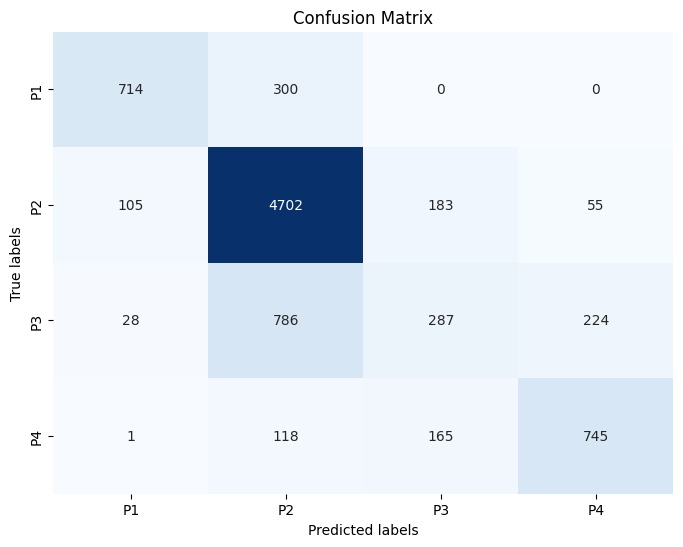

In [197]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_true contains the true labels and y_pred contains the predicted labels
# Replace y_true and y_pred with your actual true labels and predicted labels
cm = confusion_matrix(y_test, y_pred)
labels = ['P1', 'P2', 'P3', 'P4']
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [198]:
y_test.value_counts()

Approved_Flag
P2    5045
P3    1325
P4    1029
P1    1014
Name: count, dtype: int64

#Xgboost

In [199]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

xgb_classifier = xgb.XGBClassifier(objective="multi:softmax", num_class=4)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)



In [200]:
unique_categories, category_counts = np.unique(y_encoded, return_counts=True)

# Print the unique categories and their counts
for category, count in zip(unique_categories, category_counts):
    print(f"{category}: {count}")

0: 4908
1: 25452
2: 6440
3: 5264


In [201]:
y.value_counts()

Approved_Flag
P2    25452
P3     6440
P4     5264
P1     4908
Name: count, dtype: int64

In [202]:
X_train,X_test, y_train, y_test = train_test_split(X, y_encoded, test_size =0.2, random_state=42)
xgb_classifier.fit(X_train,y_train)
y_pred = xgb_classifier.predict(X_test)

Accuracy : 0.7761797218590277
[0.82433862 0.82280514 0.46928747 0.72190476]
[0.76824458 0.91397423 0.28830189 0.73663751]
[0.79530373 0.86599681 0.35717625 0.72919673]

class P1
Precision : 0.8243386243386244
Recall : 0.7682445759368837
F1 Score : 0.7953037263910159

class P2
Precision : 0.8228051391862955
Recall : 0.9139742319127849
F1 Score : 0.8659968072119447

class P3
Precision : 0.4692874692874693
Recall : 0.28830188679245283
F1 Score : 0.35717625058438524

class P4
Precision : 0.7219047619047619
Recall : 0.7366375121477162
F1 Score : 0.7291967291967293



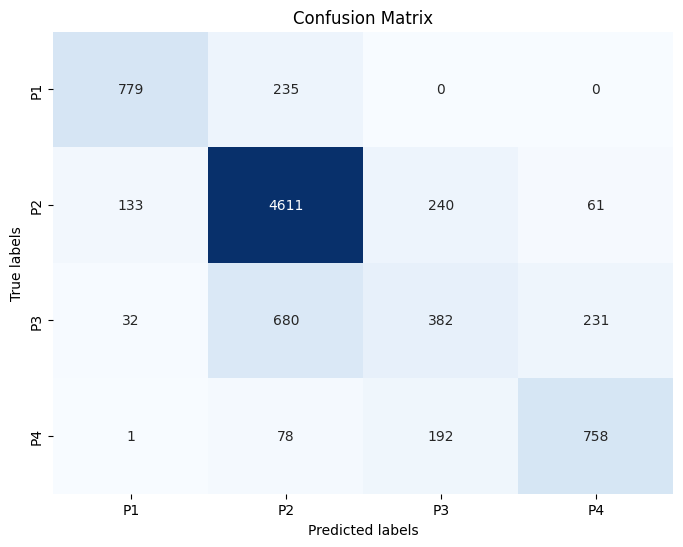

In [203]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy : {accuracy}" )

precision, recall, f1_score , _ = precision_recall_fscore_support(y_test, y_pred)
print(precision)
print(recall)
print(f1_score)
print()
for i, v in enumerate(['P1','P2','P3','P4']):
  print(f"class {v}")
  print(f"Precision : {precision[i]}")
  print(f"Recall : {recall[i]}")
  print(f"F1 Score : {f1_score[i]}")
  print()

cm = confusion_matrix(y_test, y_pred)
labels = ['P1', 'P2', 'P3', 'P4']
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [204]:
X.shape

(42064, 55)

In [205]:
y.shape

(42064,)

In [206]:
df_encoded.shape

(42064, 56)

In [207]:
from sklearn.tree import DecisionTreeClassifier
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

dt_model = DecisionTreeClassifier(max_depth=20, min_samples_split=10)
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)

Accuracy : 0.7092594793771544
[0.72981057 0.80924631 0.33709677 0.6369863 ]
[0.72189349 0.82576809 0.3154717  0.63265306]
[0.72583044 0.81742372 0.32592593 0.63481229]

class P1
Precision : 0.7298105682951147
Recall : 0.7218934911242604
F1 Score : 0.7258304412493803

class P2
Precision : 0.8092463092463092
Recall : 0.8257680872150645
F1 Score : 0.8174237221622683

class P3
Precision : 0.3370967741935484
Recall : 0.3154716981132075
F1 Score : 0.3259259259259259

class P4
Precision : 0.636986301369863
Recall : 0.6326530612244898
F1 Score : 0.6348122866894198



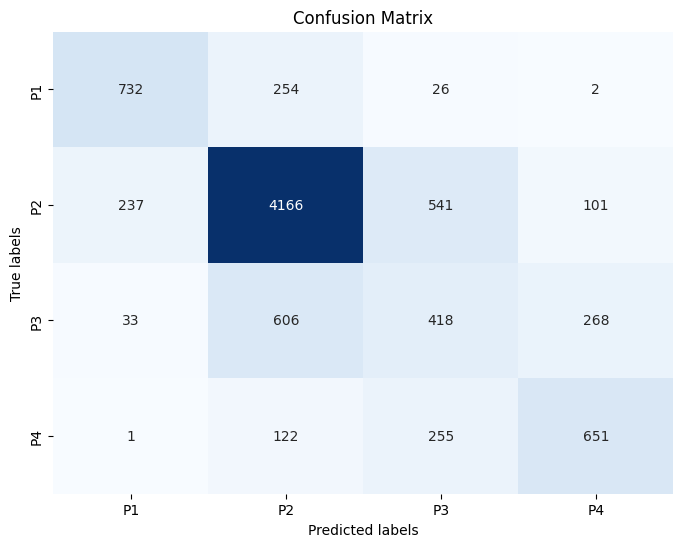

In [208]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy : {accuracy}" )

precision, recall, f1_score , _ = precision_recall_fscore_support(y_test, y_pred)
print(precision)
print(recall)
print(f1_score)
print()
for i, v in enumerate(['P1','P2','P3','P4']):
  print(f"class {v}")
  print(f"Precision : {precision[i]}")
  print(f"Recall : {recall[i]}")
  print(f"F1 Score : {f1_score[i]}")
  print()


cm = confusion_matrix(y_test, y_pred)
labels = ['P1', 'P2', 'P3', 'P4']
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [209]:
dt_model.fit(X_train,y_train)
y_train_pred = dt_model.predict(X_train)

Accuracy : 0.9147425039374758
[0.91960685 0.93416167 0.82714717 0.90947316]
[0.93708269 0.96158181 0.74936461 0.86824085]
[0.92826253 0.94767344 0.78633706 0.88837884]

class P1
Precision : 0.9196068548387096
Recall : 0.9370826913199795
F1 Score : 0.9282625286186721

class P2
Precision : 0.93416166809483
Recall : 0.9615818101631793
F1 Score : 0.947673435877623

class P3
Precision : 0.8271471730686232
Recall : 0.7493646138807429
F1 Score : 0.7863370602113038

class P4
Precision : 0.9094731634924561
Recall : 0.8682408500590318
F1 Score : 0.8883788354675042



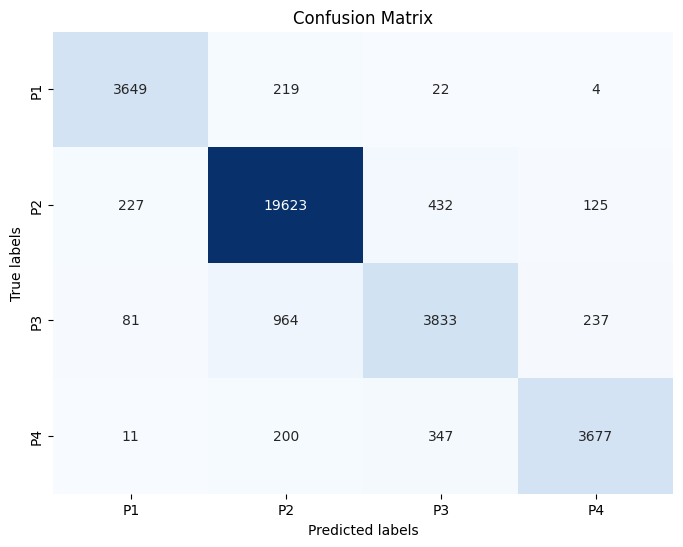

In [210]:
accuracy = accuracy_score(y_train,y_train_pred)
print(f"Accuracy : {accuracy}" )

precision, recall, f1_score , _ = precision_recall_fscore_support(y_train, y_train_pred)
print(precision)
print(recall)
print(f1_score)
print()
for i, v in enumerate(['P1','P2','P3','P4']):
  print(f"class {v}")
  print(f"Precision : {precision[i]}")
  print(f"Recall : {recall[i]}")
  print(f"F1 Score : {f1_score[i]}")
  print()


cm = confusion_matrix(y_train, y_train_pred)
labels = ['P1', 'P2', 'P3', 'P4']
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [211]:
a3 = pd.read_excel("/content/drive/MyDrive/credit risk/Unseen_Dataset.xlsx")

In [ ]:
a3.info()

In [223]:
df_no_index = df.drop(["PROSPECTID"],axis=1)

In [226]:
cols_in_df = list(df_no_index.columns)

In [228]:
cols_in_df.pop(42)

'Approved_Flag'

In [224]:
df_no_index.shape

(42064, 43)

In [229]:
df_unseen = a3[cols_in_df]

In [230]:
print(df_unseen["MARITALSTATUS"].unique())
print(df_unseen["EDUCATION"].unique())
print(df_unseen["GENDER"].unique())
print(df_unseen["last_prod_enq2"].unique())
print(df_unseen["first_prod_enq2"].unique())


df_unseen.loc[df_unseen["EDUCATION"] == 'SSC' , ["EDUCATION"]] =1
df_unseen.loc[df_unseen["EDUCATION"] == '12TH' , ["EDUCATION"]] =2
df_unseen.loc[df_unseen["EDUCATION"] == 'GRADUATE' , ["EDUCATION"]] =3
df_unseen.loc[df_unseen["EDUCATION"] == 'UNDER GRADUATE' , ["EDUCATION"]] =3
df_unseen.loc[df_unseen["EDUCATION"] == 'POST-GRADUATE' , ["EDUCATION"]] =4
df_unseen.loc[df_unseen["EDUCATION"] == 'OTHERS' , ["EDUCATION"]] =1
df_unseen.loc[df_unseen["EDUCATION"] == 'PROFESSIONAL' , ["EDUCATION"]] =3

['Married' 'Single']
['12TH' 'GRADUATE' 'SSC' 'POST-GRADUATE' 'UNDER GRADUATE' 'OTHERS']
['M' 'F']
['PL' 'ConsumerLoan' 'AL' 'CC' 'others' 'HL']
['PL' 'ConsumerLoan' 'others' 'AL' 'HL' 'CC']


In [231]:
df_unseen.head()

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,NETMONTHLYINCOME,Time_With_Curr_Empr,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2
0,0.000,0.0,0,0.000,0,0,0,4,1,4,...,51000,114,0,1,0.000,0.0,1,0,PL,PL
1,0.000,0.0,0,0.000,0,0,0,0,0,1,...,19000,50,0,0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan
2,0.125,0.0,0,0.000,1,0,0,0,2,6,...,18,191,0,0,0.000,0.0,1,0,ConsumerLoan,others
3,0.000,0.0,0,0.000,0,0,0,0,3,0,...,15000,75,0,0,0.000,0.0,0,0,AL,AL
4,0.000,0.0,1,0.167,0,0,0,0,6,0,...,0,154,0,0,0.429,0.0,1,0,ConsumerLoan,PL


In [ ]:
df_unseen["EDUCATION"] = df_unseen["EDUCATION"].astype(int)
df_unseen.info()

In [234]:
df_unseen["MARITALSTATUS"] = df_unseen["MARITALSTATUS"].astype(str)
df_unseen["GENDER"] = df_unseen["GENDER"].astype(str)
df_unseen["last_prod_enq2"] = df_unseen["last_prod_enq2"].astype(str)
df_unseen["first_prod_enq2"] = df_unseen["first_prod_enq2"].astype(str)

In [ ]:
df_encoded_unseen = pd.get_dummies(df_unseen, columns=["MARITALSTATUS","GENDER","last_prod_enq2","first_prod_enq2"])
df_encoded_unseen.info()

In [236]:
category_list = ["first_prod_enq2","GENDER","last_prod_enq2","MARITALSTATUS"]
for i in category_list:
  for item in df_unseen[i].unique():
    df_encoded_unseen[f"{i}_{item}"] = df_encoded_unseen[f"{i}_{item}"].astype(int)

In [237]:
df_encoded_unseen.head()

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_AL,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
0,0.000,0.0,0,0.000,0,0,0,4,1,4,...,0,0,1,0,0,0,0,0,1,0
1,0.000,0.0,0,0.000,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,0.125,0.0,0,0.000,1,0,0,0,2,6,...,1,0,0,0,0,0,0,0,0,1
3,0.000,0.0,0,0.000,0,0,0,0,3,0,...,0,0,0,0,1,0,0,0,0,0
4,0.000,0.0,1,0.167,0,0,0,0,6,0,...,1,0,0,0,0,0,0,0,1,0


In [243]:
df_encoded_unseen.shape
df_encoded.shape

(42064, 56)

In [ ]:
y = df_encoded["Approved_Flag"]
X = df_encoded.drop(["Approved_Flag"], axis=1)

In [245]:
X.drop(["PROSPECTID"],axis=1,inplace=True)

In [246]:
X.head(5)

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_AL,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
0,0.000,0.0,0,0.000,0,0,0,4,1,4,...,0,0,1,0,0,0,0,0,1,0
1,0.000,0.0,0,0.000,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,0.125,0.0,0,0.000,1,0,0,0,2,6,...,1,0,0,0,0,0,0,0,0,1
3,0.000,0.0,0,0.000,0,0,0,0,3,0,...,0,0,0,0,1,0,0,0,0,0
4,0.000,0.0,1,0.167,0,0,0,0,6,0,...,1,0,0,0,0,0,0,0,1,0


In [247]:
model = xgb.XGBClassifier(objective="multi:softmax",
                          num_class = 4,
                          colsample_bytree = 0.9,
                          max_depth = 3,
                          alpha = 10,
                          n_estimators = 100)

X_train,X_test, y_train, y_test = train_test_split(X, y_encoded, test_size =0.2, random_state=42)
model.fit(X_train, y_train)

y_pred_unseen = model.predict(df_encoded_unseen)

In [248]:
a3["Target_variable"] = y_pred_unseen

In [249]:
a3.to_excel("/content/drive/MyDrive/credit risk/Unseen_dataset_result.xlsx",index=False)

In [250]:
a3.head(5)

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Target_variable
0,0.000,0.0,0,0.000,0,0,0,4,1,4,...,0.000,0.0,1,0,Married,12TH,M,PL,PL,1
1,0.000,0.0,0,0.000,0,0,0,0,0,1,...,0.000,0.0,0,0,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan,1
2,0.125,0.0,0,0.000,1,0,0,0,2,6,...,0.000,0.0,1,0,Married,SSC,M,ConsumerLoan,others,1
3,0.000,0.0,0,0.000,0,0,0,0,3,0,...,0.000,0.0,0,0,Married,POST-GRADUATE,M,AL,AL,0
4,0.000,0.0,1,0.167,0,0,0,0,6,0,...,0.429,0.0,1,0,Married,12TH,M,ConsumerLoan,PL,1


In [251]:
a3["Target_variable"].value_counts()

Target_variable
1    71
3    13
2     9
0     7
Name: count, dtype: int64

In [252]:
y_encoded

array([1, 1, 1, ..., 2, 1, 1])